# Leistungsnachweis – Analyse das ersten Datensatzes
# Psychische Erkrankungen und Krankheitslast (DALYs) in verschiedenen Weltregionen (1990–2021)
Psychische Erkrankungen stellen weltweit eine bedeutende gesundheitliche Herausforderung dar. Diese Arbeit analysiert Daten der Global Burden of Disease Study 2023, die Informationen zu psychischen Erkrankungen in verschiedenen Weltregionen für den Zeitraum von 1990 bis 2021 enthalten. Ziel ist es, zeitliche Entwicklungen sowie Unterschiede zwischen Regionen, Altersgruppen und Erkrankungsarten darzustellen.

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Analyse der Krankheitslast psychischer Erkrankungen anhand von DALYs (1990–2021)
### 1.2 Fragestellung:
- Warum lässt sich im Zeitraum um 2019/2020 ein deutlicher Anstieg der DALY-Rate psychischer Erkrankungen im Zeitverlauf feststellen?
- Wie hat sich die DALY-Rate psychischer Erkrankungen von 1990 bis 2021 in den verschiedenen Weltregionen entwickelt?
- Welche Unterschiede in der DALY-Rate psychischer Erkrankungen bestehen zwischen Männern und Frauen?
 
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org/burden-of-disease

- https://ourworldindata.org/burden-of-disease#the-burden-from-non-communicable-diseases-by-sub-category

- https://vizhub.healthdata.org/gbd-results/

- https://www.bag.admin.ch/de/psychische-gesundheit-und-covid-19

- https://www.sciencedirect.com/science/article/abs/pii/S0165032725012595?utm_source

- https://www.aerzteblatt.de/news/who-nur-neun-prozent-erhalten-hilfe-bei-psychischen-problemen-4e18da57-ea76-42b3-8b9c-bd337ef11f4d?utm_source

- https://thriveworks.com/blog/women-admit-they-need-help/


### 1.4 Daten beschaffen und laden

In [6]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("mental_disorders_dalys_1990_2021.csv")

# Erste Übersicht über den Datensatz

df.head()

# Bedeutung der Variablen / Spalten:

# measure_id:   ID der Messgröße
# measure_name: Name der Messgröße (z.B. "DALYs (Disability-Adjusted Life Years)")

# location_id:   ID der Region
# location_name: Name der Region (z.B. Western Europe, Sub-Saharan Africa, ...)

# sex_id:   ID des Geschlechts
# sex_name: Geschlecht (Male / Female)

# age_id:   ID der Altersgruppe
# age_name: Altersgruppe (z.B. "<20 years", "25+ years", "<70 years")

# cause_id:   ID der Erkrankung / Ursache
# cause_name: Art der psychischen Erkrankung (z.B. Anxiety disorders, Depressive disorders, ...)

# metric_id:   ID der Messart
# metric_name: Messart (Number = absolute Anzahl, Rate = Rate pro Bevölkerung, Percent = Anteil in %)

# year: Jahr der Erhebung (1990–2021)

# val:   geschätzter Wert für die jeweilige Kombination (je nach metric_name: Number/Rate/Percent)
# lower: untere Schätzgrenze (Unsicherheitsintervall)
# upper: obere Schätzgrenze (Unsicherheitsintervall)


,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,2,DALYs (Disability-Adjusted Life Years),32,Central Asia,1,Male,157,25+ years,558,Mental disorders,1,Number,1991,255409.824795,321820.358219,184580.313464
1,2,DALYs (Disability-Adjusted Life Years),32,Central Asia,2,Female,157,25+ years,558,Mental disorders,1,Number,1991,311258.672585,403065.197676,221914.920668
2,2,DALYs (Disability-Adjusted Life Years),32,Central Asia,1,Male,157,25+ years,558,Mental disorders,2,Percent,1991,0.031173,0.038217,0.024175
3,2,DALYs (Disability-Adjusted Life Years),32,Central Asia,2,Female,157,25+ years,558,Mental disorders,2,Percent,1991,0.043357,0.053393,0.034210
4,2,DALYs (Disability-Adjusted Life Years),32,Central Asia,1,Male,157,25+ years,558,Mental disorders,3,Rate,1991,1675.730017,2111.445927,1211.021432


Diese Tabelle zeigt einen ersten Überblick über die Struktur des Datensatzes sowie die enthaltenen Variablen.
Der Datensatz enthält sowohl kategoriale Variablen (z. B. Region, Erkrankung, Geschlecht) als auch numerische Variablen (Jahr und DALY-Werte), die für Berechnungen und Visualisierungen genutzt werden.


## 2. Daten vorbereiten 
Der Datensatz liegt im Long-Format vor, wobei jede Zeile eine Kombination aus Jahr, Region, Geschlecht, Altersgruppe, Erkrankung und Messwert darstellt. Für übersichtliche Vergleiche über die Zeit werden die Daten gezielt in einfache Pivot-Tabellen (Wide-Format) umgewandelt, z. B. für Altersgruppen, Regionen oder Geschlecht im Verlauf der Jahre. Der Datensatz enthält sowohl kategoriale Variablen (Region, Geschlecht, Alter, Erkrankung) als auch numerische Variablen (Jahr und DALY-Werte).

### 2.3 DALYs nach Region 

In [65]:
table_region_year = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
].pivot_table(
    index="location_name",
    columns="year",
    values="val",
    aggfunc="mean"
).sort_index(axis=1)

table_region_year


year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
location_name,,,,,,,,,,,,,,,,,,,,,
Australasia,388.104557,388.995308,389.004431,388.278349,394.686283,389.735410,397.229391,395.966098,399.770359,403.511567,...,453.769999,453.948568,463.915618,464.937519,469.860806,478.518835,481.736170,487.571320,518.430502,522.310775
Central Asia,240.197052,241.257524,243.413670,245.177814,246.533197,247.017990,247.996332,248.763709,248.640152,252.655454,...,260.086365,259.196925,258.757572,257.840445,255.684052,256.211827,256.954981,255.659655,281.908765,284.317823
High-income North America,372.334710,375.766478,373.428932,376.163744,377.991397,379.144055,382.512256,383.127088,386.351780,388.449262,...,388.472658,387.306020,387.564008,386.684187,386.817959,385.767090,384.972136,385.214541,434.064301,433.674554
Sub-Saharan Africa,268.373177,269.008104,270.231324,269.635000,272.152762,271.394312,273.118724,274.894076,275.667441,277.228883,...,285.244795,287.698239,290.284634,293.260176,296.969938,299.765787,301.989504,304.511501,350.499830,356.590179
Western Europe,352.469536,351.902895,350.686363,349.500350,350.061251,350.137959,349.263563,349.950403,350.469552,350.483342,...,371.881157,375.527183,378.958015,383.068802,387.518278,390.390889,394.229965,398.016469,454.752167,457.058989


### 2.3 DALYs nach Geschlecht 

In [77]:
table_sex_year = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
].pivot_table(
    index="sex_name",
    columns="year",
    values="val",
    aggfunc="mean"
).sort_index(axis=1)

table_sex_year


year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
sex_name,,,,,,,,,,,,,,,,,,,,,
Female,340.480129,341.762221,341.673125,342.191103,345.163433,344.315343,347.232757,347.869855,349.802362,352.564025,...,370.953842,371.810835,375.275080,376.840897,379.485461,382.357357,384.499814,386.970942,437.184353,440.396155
Male,308.111484,309.009902,309.032763,309.311000,311.406523,310.656547,312.815350,313.210694,314.557351,316.367378,...,332.828147,333.659939,336.516859,337.475554,339.254952,341.904414,343.453288,345.418452,378.677873,381.184773


### 2.3 DALYs nach Erkrankungen 

In [67]:
df_base = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
]

top_causes = (
    df_base.groupby("cause_name")["val"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

table_cause_year = df_base[df_base["cause_name"].isin(top_causes)].pivot_table(
    index="cause_name",
    columns="year",
    values="val",
    aggfunc="mean"
).sort_index(axis=1)

table_cause_year


year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
cause_name,,,,,,,,,,,,,,,,,,,,,
Anxiety disorders,469.036562,470.189472,471.735320,474.434840,478.545127,483.140826,487.738533,492.222533,497.009593,502.233481,...,534.576499,540.832204,550.508590,559.106119,569.110271,578.144165,586.605248,596.405856,715.700128,728.647419
Attention-deficit/hyperactivity disorder,57.209903,57.413224,57.595242,57.748763,57.926256,58.087824,58.202277,58.291714,58.351182,58.402273,...,58.196906,58.380513,58.527992,58.573214,58.529044,58.500802,58.499520,58.506550,58.508238,58.569309
Autism spectrum disorders,139.309661,139.560228,139.833698,140.169167,140.534906,140.909889,141.398765,141.908335,142.457544,143.112825,...,156.109470,157.428152,158.596791,159.732469,160.815970,162.029838,163.249402,164.419870,165.256805,166.249803
Bipolar disorder,116.280373,115.960968,115.800550,115.628010,115.599286,115.647276,115.771203,115.873589,116.100019,116.308449,...,115.847968,115.682662,115.504840,115.362926,115.270748,115.227236,115.117894,115.161171,114.794637,114.464203
Conduct disorder,87.829375,87.677477,87.530186,87.673620,87.875705,88.208982,88.552414,89.022159,89.528895,89.917270,...,86.034117,86.146067,86.173053,86.187467,86.182964,86.380538,86.651762,87.021336,87.395650,87.751423
Depressive disorders,509.269224,514.081275,512.059624,511.020248,519.783156,509.361070,516.716053,512.279238,513.385414,517.898381,...,565.456495,562.594469,569.538451,567.138641,568.486846,573.596827,574.330906,575.173880,685.470470,689.262888
Eating disorders,70.555740,70.460956,70.288564,70.175622,70.124419,70.102945,70.190625,70.406240,70.657849,70.947349,...,76.461581,76.555289,76.619163,76.616970,76.591539,76.575510,76.463296,76.541514,76.508247,76.737664
Mental disorders,1783.626936,1789.623340,1789.441192,1791.630784,1805.567379,1801.172698,1815.132294,1817.971511,1826.989213,1839.561359,...,1935.400471,1940.044629,1957.427831,1964.370242,1976.536137,1991.719870,2001.871031,2014.070833,2243.621122,2259.347553
Other mental disorders,107.862161,107.943276,108.049321,108.233191,108.402665,108.601709,108.750343,109.004258,109.159578,109.296802,...,111.246430,111.361609,111.399677,111.454114,111.524458,111.564487,111.687582,111.738585,111.688784,111.658097


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

Die zentrale untersuchte Variable ist der DALY-Wert (val), welcher kontinuierlich ist. Zusätzlich enthält der Datensatz mehrere diskrete, kategoriale Variablen wie Region, Geschlecht, Altersgruppe, Erkrankung und Messart. Für diese Kategorien wird untersucht, wie viele unterschiedliche Klassen existieren und wie viele Datenpunkte pro Klasse vorhanden sind. Außerdem wird geprüft, ob fehlende Werte auftreten und wie die Verteilung der DALY-Werte aussieht. Diese deskriptive Analyse dient dazu, einen ersten Überblick über Struktur, Umfang und Eigenschaften der Rohdaten zu erhalten.

In [68]:
df.dtypes


measure_id         int64
measure_name      object
location_id        int64
location_name     object
sex_id             int64
sex_name          object
age_id             int64
age_name          object
cause_id           int64
cause_name        object
metric_id          int64
metric_name       object
year               int64
val              float64
upper            float64
lower            float64
dtype: object

In [35]:
len(df)


31680

In [69]:
table_overview = pd.DataFrame({
    "Anzahl gültiger Werte": df.count(),
    "Anzahl fehlender Werte": df.isna().sum()
})

table_overview


,Anzahl gültiger Werte,Anzahl fehlender Werte
measure_id,31680,0
measure_name,31680,0
location_id,31680,0
location_name,31680,0
sex_id,31680,0
sex_name,31680,0
age_id,31680,0
age_name,31680,0
cause_id,31680,0
cause_name,31680,0


Alle Variablen enthalten 31 680 gültige Werte und keine fehlenden Einträge.  
Der Datensatz ist vollständig und kann ohne zusätzliche Behandlung fehlender Werte weiterverarbeitet werden.


### 3.1 Zeitliche Entwicklung der DALYs nach Erkrankung (1990–2021)


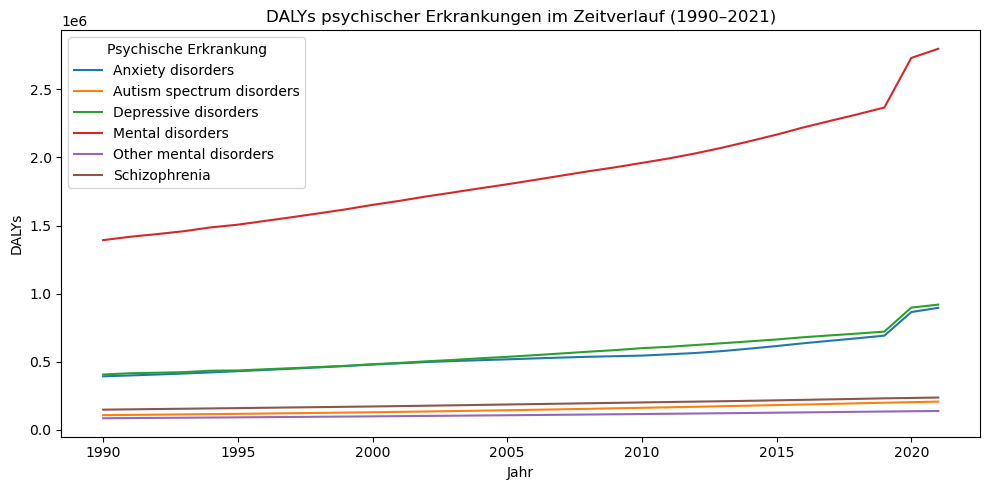

In [70]:
import matplotlib.pyplot as plt

# Basis: DALYs als absolute Anzahl
df_base = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Number")
]

# Optional: nur die wichtigsten Erkrankungen (Top 6), damit es übersichtlich bleibt
top_causes = (
    df_base.groupby("cause_name")["val"]
    .mean()
    .sort_values(ascending=False)
    .head(6)
    .index
)

df_plot = df_base[df_base["cause_name"].isin(top_causes)]

# Pivot: Jahre × Erkrankungen
cause_year = df_plot.pivot_table(
    index="year",
    columns="cause_name",
    values="val",
    aggfunc="mean"
).sort_index()

# Linienplot
plt.figure(figsize=(10, 5))
for cause in cause_year.columns:
    plt.plot(cause_year.index, cause_year[cause], label=cause)

plt.xlabel("Jahr")
plt.ylabel("DALYs")
plt.title("DALYs psychischer Erkrankungen im Zeitverlauf (1990–2021)")
plt.legend(title="Psychische Erkrankung")
plt.tight_layout()
plt.show()


### 3.2 Regionale Verteilung der DALY-Raten (1990–2021)


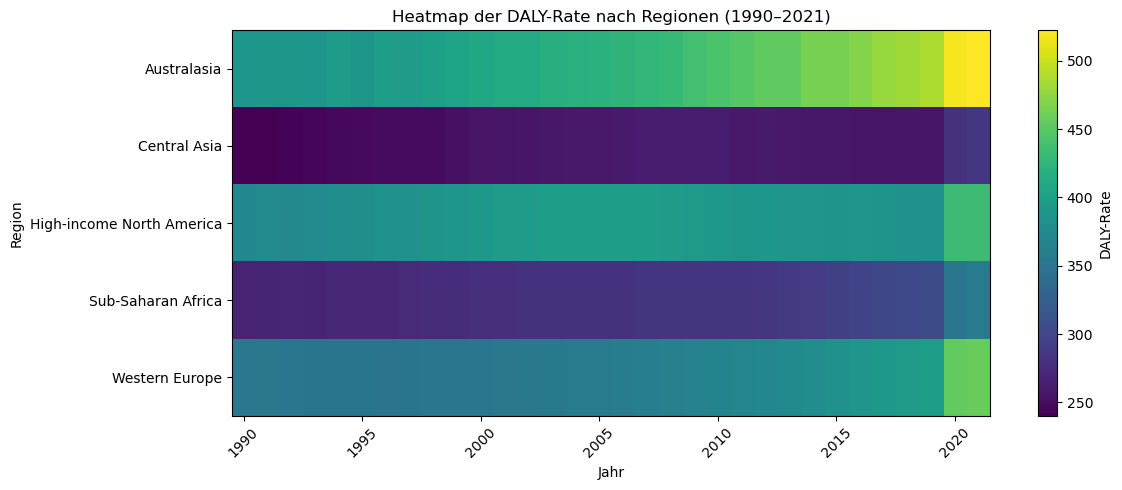

In [71]:
import matplotlib.pyplot as plt

# Basis: DALYs und Rate
df_base = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
]

# Pivot-Tabelle: Regionen (Zeilen) × Jahre (Spalten)
heatmap_data = df_base.pivot_table(
    index="location_name",
    columns="year",
    values="val",
    aggfunc="mean"
).sort_index(axis=1)

# Heatmap plotten
plt.figure(figsize=(12, 5))
plt.imshow(heatmap_data, aspect="auto")
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.xticks(range(0, len(heatmap_data.columns), 5),
           heatmap_data.columns[::5],
           rotation=45)
plt.colorbar(label="DALY-Rate")
plt.title("Heatmap der DALY-Rate nach Regionen (1990–2021)")
plt.xlabel("Jahr")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


### 3.4 DALY-Raten nach Geschlecht im Zeitverlauf


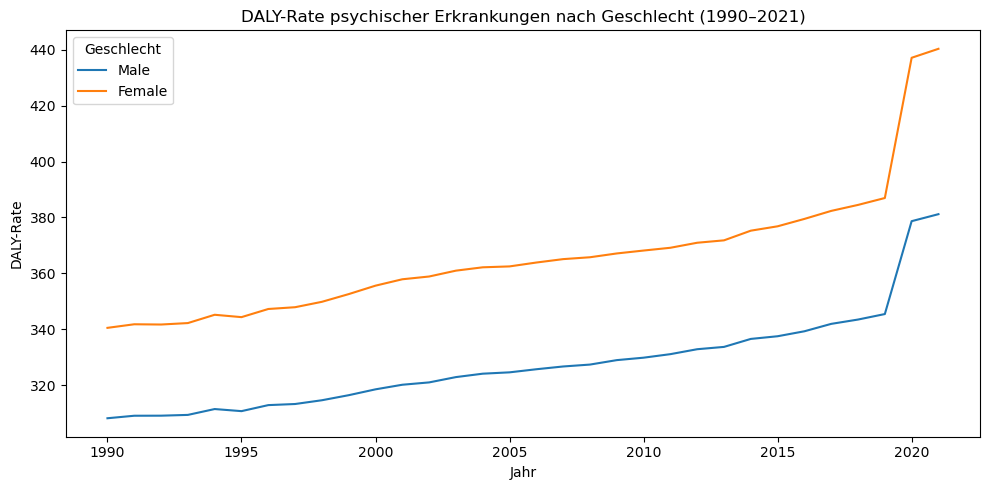

In [73]:
import matplotlib.pyplot as plt

# Basis: DALYs und Rate
df_base = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
]

# Pivot-Tabelle: Jahre × Geschlecht
sex_year = df_base.pivot_table(
    index="year",
    columns="sex_name",
    values="val",
    aggfunc="mean"
).sort_index()

# Liniendiagramm
plt.figure(figsize=(10, 5))
plt.plot(sex_year.index, sex_year["Male"], label="Male")
plt.plot(sex_year.index, sex_year["Female"], label="Female")

plt.xlabel("Jahr")
plt.ylabel("DALY-Rate")
plt.title("DALY-Rate psychischer Erkrankungen nach Geschlecht (1990–2021)")
plt.legend(title="Geschlecht")
plt.tight_layout()
plt.show()


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



### 4.1 Zeitlicher Verlauf der DALY-Rate (1990–2021)

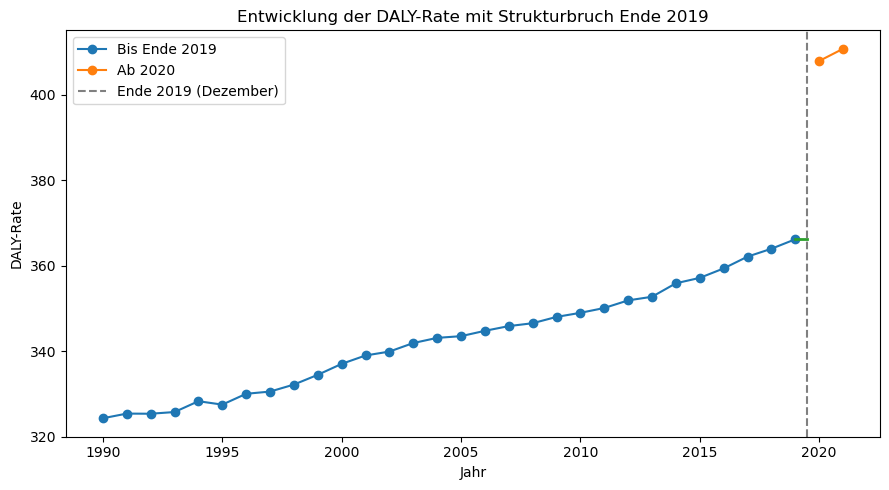

In [90]:
plt.figure(figsize=(9, 5))

# Linie + Marker bis 2019
plt.plot(
    before["year"],
    before["val"],
    marker="o",
    label="Bis Ende 2019"
)

# Linie ab 2020 (neu, nicht verbunden)
plt.plot(
    after["year"],
    after["val"],
    marker="o",
    label="Ab 2020"
)

# Wert von 2019
val_2019 = year_mean[year_mean["year"] == 2019]["val"].values[0]

# Verlängerung der Linie bis Ende 2019 (ohne Marker)
plt.plot(
    [2019, 2019.5],
    [val_2019, val_2019],
    linewidth=2
)

# Vertikale Linie: Ende 2019
plt.axvline(
    2019.5,
    linestyle="--",
    color="grey",
    label="Ende 2019 (Dezember)"
)

plt.xlabel("Jahr")
plt.ylabel("DALY-Rate")
plt.title("Entwicklung der DALY-Rate mit Strukturbruch Ende 2019")
plt.legend()
plt.tight_layout()
plt.show()

#### 4.1.1 Berechnungen 

In [91]:
# A) Durchschnittliches Niveau vor und nach dem Bruch
mean_before_2020 = df_base[df_base["year"] <= 2019]["val"].mean()
mean_after_2020  = df_base[df_base["year"] >= 2020]["val"].mean()

absolute_level_change = mean_after_2020 - mean_before_2020
relative_level_change = (absolute_level_change / mean_before_2020) * 100


# B) Direkter Sprung vom Jahr 2019 zu 2020
val_2019 = df_base[df_base["year"] == 2019]["val"].mean()
val_2020 = df_base[df_base["year"] == 2020]["val"].mean()

absolute_jump_2019_2020 = val_2020 - val_2019
relative_jump_2019_2020 = (absolute_jump_2019_2020 / val_2019) * 100


# C) Sprung vom Jahr 2019 bis zum Peak nach dem Bruch
peak_after_2020 = df_base[df_base["year"] >= 2020]["val"].max()

absolute_jump_to_peak = peak_after_2020 - val_2019
relative_jump_to_peak = (absolute_jump_to_peak / val_2019) * 100


# Ausgabe
print("=== Niveauvergleich ===")
print("Durchschnitt bis 2019:", mean_before_2020)
print("Durchschnitt ab 2020:", mean_after_2020)
print("Relativer Niveauanstieg (%):", relative_level_change)

print("\n=== Direkter Sprung ===")
print("DALY 2019:", val_2019)
print("DALY 2020:", val_2020)
print("Relativer Sprung 2019→2020 (%):", relative_jump_2019_2020)

print("\n=== Sprung bis Peak ===")
print("Peak ab 2020:", peak_after_2020)
print("Relativer Sprung 2019→Peak (%):", relative_jump_to_peak)


=== Niveauvergleich ===
Durchschnitt bis 2019: 342.7287024965234
Durchschnitt ab 2020: 409.360788586312
Relativer Niveauanstieg (%): 19.441641626284433

=== Direkter Sprung ===
DALY 2019: 366.1946969448739
DALY 2020: 407.9311130513553
Relativer Sprung 2019→2020 (%): 11.39732946836319

=== Sprung bis Peak ===
Peak ab 2020: 3404.565957194952
Relativer Sprung 2019→Peak (%): 829.7147079405869


Zur quantitativen Einordnung des Anstiegs wurden mehrere Kennzahlen berechnet. Der DALY-Wert im Jahr 2020 zeigt das Niveau direkt nach Beginn des starken Anstiegs. Der relative Sprung von 2019 auf 2020 verdeutlicht, wie abrupt sich die DALY-Rate innerhalb eines Jahres verändert hat. Zusätzlich beschreibt der Peak ab 2020 das maximale Belastungsniveau, während der relative Sprung von 2019 bis zum Peak zeigt, wie stark die DALY-Rate insgesamt nach dem Strukturbruch angestiegen ist.

#### 4.1.2 Beobachtungen

Das Liniendiagramm der durchschnittlichen DALY-Rate zeigt von 1990 bis 2019 einen kontinuierlichen und relativ gleichmäßigen Anstieg. Zwischen den Jahren 2019 und 2020 ist jedoch ein deutlicher Niveauwechsel sichtbar. Ab 2020 setzt die DALY-Rate auf einem klar höheren Niveau fort als zuvor, was auf einen strukturellen Bruch im zeitlichen Verlauf hinweist.

#### 4.1.3 Interpretation

Der beobachtete Anstieg fällt zeitlich mit dem Beginn der COVID-19-Pandemie zusammen, die Ende 2019 erstmals auftrat und sich im Jahr 2020 weltweit ausbreitete. Mehrere internationale Studien zur globalen Krankheitslast berichten, dass insbesondere Angst- und depressive Störungen während der Pandemie deutlich zugenommen haben. Als mögliche Ursachen werden unter anderem soziale Isolation, wirtschaftliche Unsicherheit und veränderte Lebensbedingungen genannt. Der zeitliche Zusammenhang legt nahe, dass diese Faktoren zur erhöhten DALY-Rate beigetragen haben könnten.

In [103]:
# Basisdaten filtern
df_base = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
]

regions = [
    "Australasia",
    "High-income North America",
    "Western Europe",
    "Sub-Saharan Africa",
    "Central Asia"
]

df_base = df_base[df_base["location_name"].isin(regions)]

# Durchschnittliche DALY-Raten berechnen
mean_rates = {}

for region in regions:
    mean_rates[region] = df_base[df_base["location_name"] == region]["val"].mean()

# Alle Durchschnittswerte ausgeben
print("Durchschnittliche DALY-Raten nach Region:")
for region, value in mean_rates.items():
    print(f"- {region}: {value:.1f}")

# Höchste & niedrigste Region
highest_region = max(mean_rates, key=mean_rates.get)
lowest_region = min(mean_rates, key=mean_rates.get)

difference = mean_rates[highest_region] - mean_rates[lowest_region]

print("\nVergleich:")
print(f"Höchste durchschnittliche DALY-Rate: {highest_region} ({mean_rates[highest_region]:.1f})")
print(f"Niedrigste durchschnittliche DALY-Rate: {lowest_region} ({mean_rates[lowest_region]:.1f})")
print(f"Differenz zwischen höchster und niedrigster Region: {difference:.1f}")



Durchschnittliche DALY-Raten nach Region:
- Australasia: 432.1
- High-income North America: 390.5
- Western Europe: 368.9
- Sub-Saharan Africa: 286.6
- Central Asia: 256.3

Vergleich:
Höchste durchschnittliche DALY-Rate: Australasia (432.1)
Niedrigste durchschnittliche DALY-Rate: Central Asia (256.3)
Differenz zwischen höchster und niedrigster Region: 175.9


### Beobachtung
Wie im Diagramm der Weltregionen zu sehen ist, unterscheiden sich die DALY-Raten
psychischer Erkrankungen deutlich zwischen den betrachteten Regionen. Um diese
Unterschiede zu quantifizieren, wurden die durchschnittlichen DALY-Raten für jede
ausgewählte Weltregion berechnet.

Die Berechnungen zeigen, dass Hoch-Einkommensregionen wie Australasien,
Nordamerika (hohes Einkommen) und Westeuropa höhere durchschnittliche DALY-Raten
aufweisen als Subsahara-Afrika und Zentralasien. Die höchste durchschnittliche
Belastung zeigt Australasien, während Zentralasien die niedrigsten Werte aufweist.
Die Differenz zwischen der höchsten und der niedrigsten Region verdeutlicht das
Ausmaß der regionalen Unterschiede.



### Analyse
Die Auswahl der betrachteten Weltregionen erfolgte bewusst kontrastierend.
Australasien, Nordamerika und Westeuropa repräsentieren Hoch-Einkommensregionen
mit gut ausgebauten Gesundheitssystemen und hoher Datenqualität, während
Subsahara-Afrika und Zentralasien Regionen mit geringerem Einkommensniveau
und eingeschränktem Zugang zu Gesundheitsversorgung darstellen. Diese Auswahl
ermöglicht es, globale Unterschiede klar und übersichtlich darzustellen, ohne
die Analyse durch zu viele Regionen unübersichtlich zu machen.

Die beobachteten Unterschiede in den DALY-Raten lassen sich durch mehrere
Faktoren erklären. In Hoch-Einkommensregionen werden psychische Erkrankungen
häufiger diagnostiziert und systematisch erfasst, was zu höheren gemessenen
DALY-Raten führt. In Regionen mit geringeren Ressourcen kann Unterdiagnose
und unvollständige Datenerfassung zu niedrigeren ausgewiesenen Werten führen.
Darüber hinaus beeinflussen soziale, wirtschaftliche und demografische Faktoren
sowie Arbeits- und Lebensbedingungen die regionale Krankheitslast.


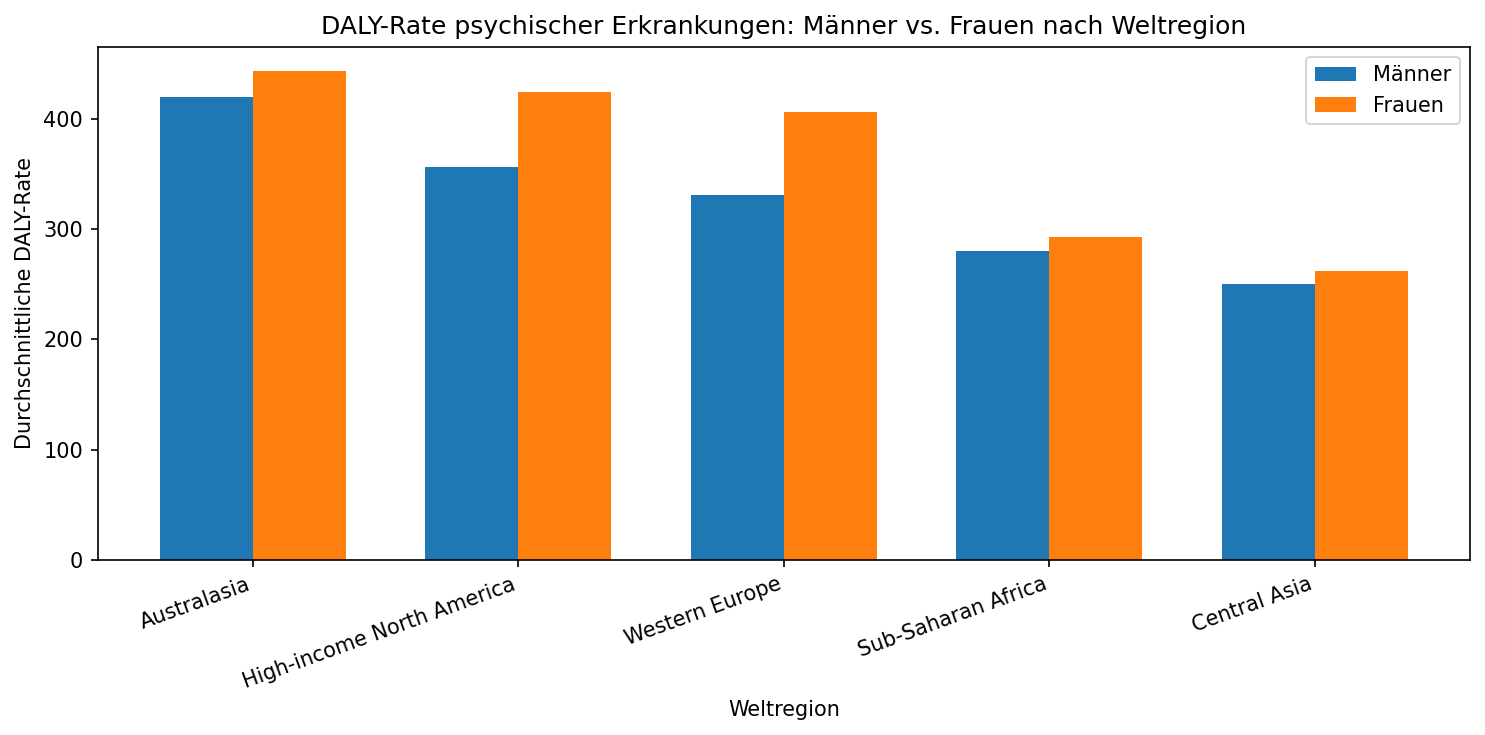

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sicherstellen, dass df existiert
if "df" not in globals():
    raise NameError("df ist nicht definiert. Bitte zuerst die CSV laden (pd.read_csv).")

# Filter: DALYs + Rate
df_base = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
].copy()

# Geschlechter (Male/Female) filtern
df_base["sex"] = df_base["sex_name"].astype(str).str.strip().str.lower()
df_base = df_base[df_base["sex"].isin(["male", "female"])]

# Regionen auswählen (nur die, die wirklich im Datensatz vorkommen)
regions_wanted = [
    "Australasia",
    "High-income North America",
    "Western Europe",
    "Sub-Saharan Africa",
    "Central Asia"
]
regions_available = set(df_base["location_name"].unique())
regions = [r for r in regions_wanted if r in regions_available]

if len(regions) == 0:
    raise ValueError("Keine der gewünschten Regionen gefunden. Prüfe df['location_name'].unique().")

df_base = df_base[df_base["location_name"].isin(regions)]

# Mittelwerte berechnen (über alle Jahre, alle Ursachen, etc. innerhalb Filter)
grouped = (
    df_base
    .groupby(["location_name", "sex"])["val"]
    .mean()
    .unstack()
    .reindex(regions)
)

# Falls eine Spalte fehlt (sicherer)
for col in ["male", "female"]:
    if col not in grouped.columns:
        grouped[col] = np.nan

# Plot
x = np.arange(len(regions))
width = 0.35

plt.figure(figsize=(10, 5), dpi=150)
plt.bar(x - width/2, grouped["male"], width, label="Männer")
plt.bar(x + width/2, grouped["female"], width, label="Frauen")

plt.xticks(x, regions, rotation=20, ha="right")
plt.ylabel("Durchschnittliche DALY-Rate")
plt.xlabel("Weltregion")
plt.title("DALY-Rate psychischer Erkrankungen: Männer vs. Frauen nach Weltregion")
plt.legend()
plt.tight_layout()
plt.show()



In [11]:
import pandas as pd

# Sicherstellen, dass df existiert
if "df" not in globals():
    raise NameError("df ist nicht definiert. Bitte zuerst die CSV laden.")

# Filter: DALYs + Rate
df_base = df[
    (df["measure_name"] == "DALYs (Disability-Adjusted Life Years)") &
    (df["metric_name"] == "Rate")
].copy()

# Geschlecht bereinigen
df_base["sex"] = df_base["sex_name"].str.lower().str.strip()
df_base = df_base[df_base["sex"].isin(["male", "female"])]

# Regionen auswählen
regions = [
    "Australasia",
    "High-income North America",
    "Western Europe",
    "Sub-Saharan Africa",
    "Central Asia"
]
df_base = df_base[df_base["location_name"].isin(regions)]

# Durchschnittliche DALY-Rate pro Region & Geschlecht
grouped = (
    df_base
    .groupby(["location_name", "sex"])["val"]
    .mean()
    .unstack()
)

# Prozentuale Differenz berechnen
percent_diff = {}

for region in grouped.index:
    male = grouped.loc[region, "male"]
    female = grouped.loc[region, "female"]
    percent_diff[region] = (female - male) / male * 100

# Ergebnisse ausgeben
print("Prozentuale Unterschiede (Frauen vs. Männer):\n")
for region, diff in percent_diff.items():
    print(f"{region}: Frauen liegen um {diff:.1f} % über den Männern")


Prozentuale Unterschiede (Frauen vs. Männer):

Australasia: Frauen liegen um 5.6 % über den Männern
Central Asia: Frauen liegen um 4.7 % über den Männern
High-income North America: Frauen liegen um 19.2 % über den Männern
Sub-Saharan Africa: Frauen liegen um 4.7 % über den Männern
Western Europe: Frauen liegen um 22.7 % über den Männern


### Beobachtung
Wie im Diagramm zum allgemeinen Vergleich zwischen Männern und Frauen zu sehen ist,
weisen Frauen insgesamt höhere DALY-Raten psychischer Erkrankungen auf als Männer.
Dieser Unterschied zeigt sich konsistent über den gesamten betrachteten Zeitraum.
 
Wie im Diagramm zum Vergleich nach Weltregionen zusätzlich zu erkennen ist, besteht
dieser Geschlechterunterschied in allen betrachteten Regionen. Das Ausmaß der
Unterschiede variiert jedoch regional. Besonders ausgeprägt ist der Abstand zwischen
Frauen und Männern in Hoch-Einkommensregionen wie Westeuropa, Nordamerika und
Australasien, während die Unterschiede in Subsahara-Afrika und Zentralasien geringer
ausfallen.



### Analyse
In einkommensschwächeren Regionen sind die Unterschiede zwischen Männern und Frauen gering, da beide Geschlechter häufig nur eingeschränkten Zugang zu psychischer Gesundheitsversorgung haben und viele psychische Erkrankungen nicht diagnostiziert werden. Wenn der Zugang für große Teile der Bevölkerung fehlt, bleiben sowohl die absoluten DALY-Raten als auch geschlechtsspezifische Unterschiede niedrig. In Hoch-Einkommensregionen ist die Versorgung deutlich besser ausgebaut, wodurch psychische Erkrankungen häufiger erkannt werden. Dabei nutzen Frauen psychische Gesundheitsangebote häufiger als Männer, was zu höheren gemessenen DALY-Raten bei Frauen und damit zu größeren Geschlechterunterschieden führt. Australasien stellt eine Ausnahme dar, da Männer und Frauen dort einen ähnlich guten Zugang zur psychischen Gesundheitsversorgung haben und Männer häufiger Hilfe in Anspruch nehmen, wodurch sich die gemessenen DALY-Raten zwischen den Geschlechtern stärker angleichen. Gleichzeitig kann nicht ausgeschlossen werden, dass die tatsächliche Krankheitslast psychischer Erkrankungen zwischen Männern und Frauen in einigen Regionen ähnlich hoch ist, da die beobachteten Unterschiede auch durch Unterschiede in Diagnostik und Inanspruchnahme beeinflusst werden.

